# Preparing the Data

Note: You can skip this notebook because all the required Parquet files are already in _data/biketrips/_.

## Download the data

- Download https://s3.amazonaws.com/tripdata/202403-citibike-tripdata.csv.zip (113,4 MB)
- Unzip
- Make sure the CSV files are in a subdirectory called _202403-citibike-tripdata.csv/_ (macOS does this by default if you "Open" the ZIP file)

In [1]:
! ls 202403-citibike-tripdata.csv/*.csv

202403-citibike-tripdata.csv/202403-citibike-tripdata_1.csv
202403-citibike-tripdata.csv/202403-citibike-tripdata_2.csv
202403-citibike-tripdata.csv/202403-citibike-tripdata_3.csv


In [2]:
! head 202403-citibike-tripdata.csv/202403-citibike-tripdata_1.csv

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0FC89A53DF9D7E90,electric_bike,2024-03-07 19:49:43,2024-03-07 20:20:33,48 St & Skillman Ave,6283.05,Kingston Ave & Park Pl,4016.03,40.746153593,-73.916188598,40.67308,-73.94191,member
0FF38F5D1277746B,electric_bike,2024-03-15 17:45:30,2024-03-15 17:55:39,Liberty St & Broadway,5105.01,Mercer St & Spring St,5532.01,40.708858728,-74.01023221,40.72362738,-73.99949601,member
DE040AD144FB0BFA,electric_bike,2024-03-19 18:00:52,2024-03-19 18:07:26,W 56 St & 6 Ave,6809.07,E 43 St & Madison Ave,6551.11,40.76340613,-73.97722479,40.75354681867074,-73.97896572947502,member
5C7DFD80B04BBA5A,electric_bike,2024-03-05 17:25:30,2024-03-05 17:30:17,W 56 St & 6 Ave,6809.07,E 43 St & Madison Ave,6551.11,40.763061881,-73.977671742,40.75354681867074,-73.97896572947502,member
5C0A03B95B0D0A0F,electric_bike,2024-03-22 13:18:37,2024-03-22 13:23:24,5 Ave 

In [3]:
import polars as pl

In [4]:
trips = (
    pl.read_csv("202403-citibike-tripdata.csv/*.csv", infer_schema_length=100000)
    .select(pl.col("rideable_type").str.split("_").list.get(0).alias("bike_type"),
            pl.col("member_casual").alias("rider_type"),
            pl.col("started_at").str.strptime(pl.Datetime).alias("datetime_start"),
            pl.col("ended_at").str.strptime(pl.Datetime).alias("datetime_end"),
            pl.col("start_station_name").alias("station_start"),
            pl.col("end_station_name").alias("station_end"),
            pl.col("start_lat").alias("lat_start"),
            pl.col("start_lng").alias("lon_start"),
            pl.col("end_lat").alias("lat_end"),
            pl.col("end_lng").alias("lon_end")
           )
    .with_columns((pl.col("datetime_end") - pl.col("datetime_start")).alias("duration"))
)

trips

bike_type,rider_type,datetime_start,datetime_end,station_start,station_end,lat_start,lon_start,lat_end,lon_end,duration
str,str,datetime[μs],datetime[μs],str,str,f64,f64,f64,f64,duration[μs]
"""electric""","""member""",2024-03-07 19:49:43,2024-03-07 20:20:33,"""48 St & Skillman Ave""","""Kingston Ave & Park Pl""",40.746154,-73.916189,40.67308,-73.94191,30m 50s
"""electric""","""member""",2024-03-15 17:45:30,2024-03-15 17:55:39,"""Liberty St & Broadway""","""Mercer St & Spring St""",40.708859,-74.010232,40.723627,-73.999496,10m 9s
"""electric""","""member""",2024-03-19 18:00:52,2024-03-19 18:07:26,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""",40.763406,-73.977225,40.753547,-73.978966,6m 34s
"""electric""","""member""",2024-03-05 17:25:30,2024-03-05 17:30:17,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""",40.763062,-73.977672,40.753547,-73.978966,4m 47s
"""electric""","""member""",2024-03-22 13:18:37,2024-03-22 13:23:24,"""5 Ave & W 126 St""","""Frederick Douglass Blvd & W 11…",40.660947,-73.983043,40.803865,-73.955931,4m 47s
…,…,…,…,…,…,…,…,…,…,…
"""classic""","""member""",2024-03-19 12:23:34,2024-03-19 12:29:24,"""Madison Ave & E 51 St""","""Broadway & W 56 St""",40.75863,-73.97513,40.765265,-73.981923,5m 50s
"""classic""","""member""",2024-03-19 17:50:32,2024-03-19 17:57:29,"""Madison Ave & E 51 St""","""Broadway & W 56 St""",40.75863,-73.97513,40.765265,-73.981923,6m 57s
"""classic""","""member""",2024-03-12 09:17:35,2024-03-12 09:27:14,"""West End Ave & W 94 St""","""W 120 St & Claremont Ave""",40.794165,-73.974124,40.810949,-73.9634,9m 39s


## Add distance

In [5]:
import geopandas as gpd

In [6]:
# We need to project the coordinates in order to get meters

point_start = gpd.GeoSeries(gpd.points_from_xy(trips["lon_start"], trips["lat_start"]), crs="EPSG:4326").to_crs("EPSG:32118")
point_end = gpd.GeoSeries(gpd.points_from_xy(trips["lon_end"], trips["lat_end"]), crs="EPSG:4326").to_crs("EPSG:32118")
distance = point_start.distance(point_end)

trips = trips.with_columns(distance=pl.lit(pl.Series(distance / 1000)))
trips

bike_type,rider_type,datetime_start,datetime_end,station_start,station_end,lat_start,lon_start,lat_end,lon_end,duration,distance
str,str,datetime[μs],datetime[μs],str,str,f64,f64,f64,f64,duration[μs],f64
"""electric""","""member""",2024-03-07 19:49:43,2024-03-07 20:20:33,"""48 St & Skillman Ave""","""Kingston Ave & Park Pl""",40.746154,-73.916189,40.67308,-73.94191,30m 50s,8.400734
"""electric""","""member""",2024-03-15 17:45:30,2024-03-15 17:55:39,"""Liberty St & Broadway""","""Mercer St & Spring St""",40.708859,-74.010232,40.723627,-73.999496,10m 9s,1.874201
"""electric""","""member""",2024-03-19 18:00:52,2024-03-19 18:07:26,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""",40.763406,-73.977225,40.753547,-73.978966,6m 34s,1.10469
"""electric""","""member""",2024-03-05 17:25:30,2024-03-05 17:30:17,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""",40.763062,-73.977672,40.753547,-73.978966,4m 47s,1.062271
"""electric""","""member""",2024-03-22 13:18:37,2024-03-22 13:23:24,"""5 Ave & W 126 St""","""Frederick Douglass Blvd & W 11…",40.660947,-73.983043,40.803865,-73.955931,4m 47s,16.035214
…,…,…,…,…,…,…,…,…,…,…,…
"""classic""","""member""",2024-03-19 12:23:34,2024-03-19 12:29:24,"""Madison Ave & E 51 St""","""Broadway & W 56 St""",40.75863,-73.97513,40.765265,-73.981923,5m 50s,0.933801
"""classic""","""member""",2024-03-19 17:50:32,2024-03-19 17:57:29,"""Madison Ave & E 51 St""","""Broadway & W 56 St""",40.75863,-73.97513,40.765265,-73.981923,6m 57s,0.933801
"""classic""","""member""",2024-03-12 09:17:35,2024-03-12 09:27:14,"""West End Ave & W 94 St""","""W 120 St & Claremont Ave""",40.794165,-73.974124,40.810949,-73.9634,9m 39s,2.071929


## Stations

In [7]:
stations = trips.group_by(pl.col("station_start").alias("station")).agg(
    pl.col("lat_start").median().alias("lat"),
    pl.col("lon_start").median().alias("lon"),
).sort("station").drop_nulls()

In [8]:
gdf_stations = gpd.GeoDataFrame(
    stations.to_pandas(), geometry=gpd.points_from_xy(stations["lon"], stations["lat"]), crs="EPSG:4326"
)

<Axes: >

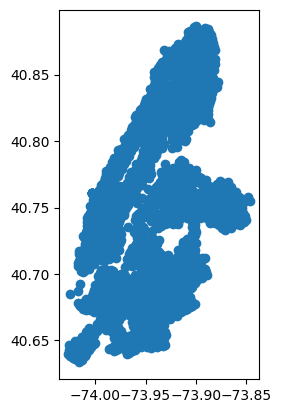

In [9]:
gdf_stations.plot()

In [10]:
gdf_neighborhoods = gpd.read_file("nyc-neighborhoods.geojson")
gdf_neighborhoods

,neighborhood,boroughCode,borough,X.id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.84860 40.87167, -73.84582 40.870..."
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.74333 40.73888, -73.74371 40.739..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.16983 40.56108, -74.16982 40.561..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.15975 40.64142, -74.15998 40.641..."
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.06078 40.59319, -74.06079 40.593..."
...,...,...,...,...,...
307,Woodside,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.90087 40.75767, -73.90014 40.756..."
308,East Williamsburg,3,Brooklyn,None,"POLYGON ((-73.94130 40.72180, -73.94060 40.718..."
309,Hamilton Heights,1,Manhattan,None,"POLYGON ((-73.95050 40.83490, -73.94110 40.831..."
310,Williamsburg,3,Brooklyn,None,"POLYGON ((-73.95757 40.72510, -73.95300 40.722..."


<Axes: >

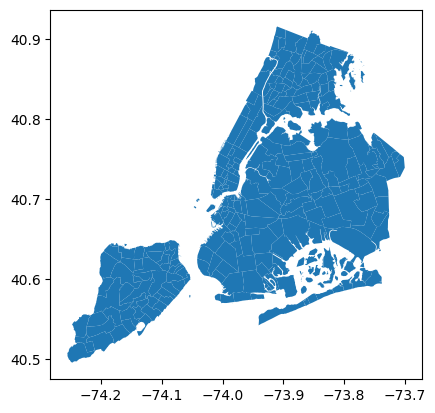

In [11]:
gdf_neighborhoods.plot()

In [12]:
stations = (
    pl.from_pandas(gdf_stations.sjoin(gdf_neighborhoods).drop("geometry", axis=1))
    .select(pl.col("station"),
            pl.col("borough"),
            pl.col("neighborhood"),
           )
)

stations

station,borough,neighborhood
str,str,str
"""1 Ave & E 110 St""","""Manhattan""","""East Harlem"""
"""1 Ave & E 16 St""","""Manhattan""","""Stuyvesant Town"""
"""1 Ave & E 18 St""","""Manhattan""","""Stuyvesant Town"""
"""1 Ave & E 30 St""","""Manhattan""","""Kips Bay"""
"""1 Ave & E 38 St""","""Manhattan""","""Murray Hill"""
…,…,…
"""Wyckoff Ave & Stanhope St""","""Brooklyn""","""Bushwick"""
"""Wyckoff St & 3 Ave""","""Brooklyn""","""Gowanus"""
"""Wythe Ave & Metropolitan Ave""","""Brooklyn""","""Williamsburg"""


In [13]:
trips

bike_type,rider_type,datetime_start,datetime_end,station_start,station_end,lat_start,lon_start,lat_end,lon_end,duration,distance
str,str,datetime[μs],datetime[μs],str,str,f64,f64,f64,f64,duration[μs],f64
"""electric""","""member""",2024-03-07 19:49:43,2024-03-07 20:20:33,"""48 St & Skillman Ave""","""Kingston Ave & Park Pl""",40.746154,-73.916189,40.67308,-73.94191,30m 50s,8.400734
"""electric""","""member""",2024-03-15 17:45:30,2024-03-15 17:55:39,"""Liberty St & Broadway""","""Mercer St & Spring St""",40.708859,-74.010232,40.723627,-73.999496,10m 9s,1.874201
"""electric""","""member""",2024-03-19 18:00:52,2024-03-19 18:07:26,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""",40.763406,-73.977225,40.753547,-73.978966,6m 34s,1.10469
"""electric""","""member""",2024-03-05 17:25:30,2024-03-05 17:30:17,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""",40.763062,-73.977672,40.753547,-73.978966,4m 47s,1.062271
"""electric""","""member""",2024-03-22 13:18:37,2024-03-22 13:23:24,"""5 Ave & W 126 St""","""Frederick Douglass Blvd & W 11…",40.660947,-73.983043,40.803865,-73.955931,4m 47s,16.035214
…,…,…,…,…,…,…,…,…,…,…,…
"""classic""","""member""",2024-03-19 12:23:34,2024-03-19 12:29:24,"""Madison Ave & E 51 St""","""Broadway & W 56 St""",40.75863,-73.97513,40.765265,-73.981923,5m 50s,0.933801
"""classic""","""member""",2024-03-19 17:50:32,2024-03-19 17:57:29,"""Madison Ave & E 51 St""","""Broadway & W 56 St""",40.75863,-73.97513,40.765265,-73.981923,6m 57s,0.933801
"""classic""","""member""",2024-03-12 09:17:35,2024-03-12 09:27:14,"""West End Ave & W 94 St""","""W 120 St & Claremont Ave""",40.794165,-73.974124,40.810949,-73.9634,9m 39s,2.071929


In [14]:
trips_final = (
    trips.join(stations.select(pl.all().name.suffix("_start")), on="station_start")
    .join(stations.select(pl.all().name.suffix("_end")), on="station_end")
    .select(
 pl.col('bike_type').cast(pl.Categorical),
 pl.col('rider_type').cast(pl.Categorical),       
 'datetime_start',
 'datetime_end',
 'duration',
 'station_start',
 'station_end',
 'neighborhood_start',
 'neighborhood_end',
 'borough_start',
 'borough_end',
 'lat_start',
 'lon_start', 
 'lat_end',
 'lon_end',
 'distance',
    )
)

trips_final

bike_type,rider_type,datetime_start,datetime_end,duration,station_start,station_end,neighborhood_start,neighborhood_end,borough_start,borough_end,lat_start,lon_start,lat_end,lon_end,distance
cat,cat,datetime[μs],datetime[μs],duration[μs],str,str,str,str,str,str,f64,f64,f64,f64,f64
"""electric""","""member""",2024-03-07 19:49:43,2024-03-07 20:20:33,30m 50s,"""48 St & Skillman Ave""","""Kingston Ave & Park Pl""","""Sunnyside""","""Crown Heights""","""Queens""","""Brooklyn""",40.746154,-73.916189,40.67308,-73.94191,8.400734
"""electric""","""member""",2024-03-15 17:45:30,2024-03-15 17:55:39,10m 9s,"""Liberty St & Broadway""","""Mercer St & Spring St""","""Financial District""","""SoHo""","""Manhattan""","""Manhattan""",40.708859,-74.010232,40.723627,-73.999496,1.874201
"""electric""","""member""",2024-03-19 18:00:52,2024-03-19 18:07:26,6m 34s,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""","""Midtown""","""Midtown""","""Manhattan""","""Manhattan""",40.763406,-73.977225,40.753547,-73.978966,1.10469
"""electric""","""member""",2024-03-05 17:25:30,2024-03-05 17:30:17,4m 47s,"""W 56 St & 6 Ave""","""E 43 St & Madison Ave""","""Midtown""","""Midtown""","""Manhattan""","""Manhattan""",40.763062,-73.977672,40.753547,-73.978966,1.062271
"""electric""","""member""",2024-03-22 13:18:37,2024-03-22 13:23:24,4m 47s,"""5 Ave & W 126 St""","""Frederick Douglass Blvd & W 11…","""Harlem""","""Harlem""","""Manhattan""","""Manhattan""",40.660947,-73.983043,40.803865,-73.955931,16.035214
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""classic""","""member""",2024-03-19 12:23:34,2024-03-19 12:29:24,5m 50s,"""Madison Ave & E 51 St""","""Broadway & W 56 St""","""Midtown""","""Midtown""","""Manhattan""","""Manhattan""",40.75863,-73.97513,40.765265,-73.981923,0.933801
"""classic""","""member""",2024-03-19 17:50:32,2024-03-19 17:57:29,6m 57s,"""Madison Ave & E 51 St""","""Broadway & W 56 St""","""Midtown""","""Midtown""","""Manhattan""","""Manhattan""",40.75863,-73.97513,40.765265,-73.981923,0.933801
"""classic""","""member""",2024-03-12 09:17:35,2024-03-12 09:27:14,9m 39s,"""West End Ave & W 94 St""","""W 120 St & Claremont Ave""","""Upper West Side""","""Morningside Heights""","""Manhattan""","""Manhattan""",40.794165,-73.974124,40.810949,-73.9634,2.071929


In [15]:
trips_parts = (
    trips_final
    .sort("datetime_start")
    .with_columns(date=pl.col("datetime_start").dt.date().cast(pl.String))
    .partition_by(["date"], as_dict=True, include_key=False)
)

for key, df in trips_parts.items():
    df.write_parquet(f"data/biketrips/biketrips-{key[0]}.parquet")

In [16]:
! ls data/biketrips

biketrips-2024-03-01.parquet  biketrips-2024-03-17.parquet
biketrips-2024-03-02.parquet  biketrips-2024-03-18.parquet
biketrips-2024-03-03.parquet  biketrips-2024-03-19.parquet
biketrips-2024-03-04.parquet  biketrips-2024-03-20.parquet
biketrips-2024-03-05.parquet  biketrips-2024-03-21.parquet
biketrips-2024-03-06.parquet  biketrips-2024-03-22.parquet
biketrips-2024-03-07.parquet  biketrips-2024-03-23.parquet
biketrips-2024-03-08.parquet  biketrips-2024-03-24.parquet
biketrips-2024-03-09.parquet  biketrips-2024-03-25.parquet
biketrips-2024-03-10.parquet  biketrips-2024-03-26.parquet
biketrips-2024-03-11.parquet  biketrips-2024-03-27.parquet
biketrips-2024-03-12.parquet  biketrips-2024-03-28.parquet
biketrips-2024-03-13.parquet  biketrips-2024-03-29.parquet
biketrips-2024-03-14.parquet  biketrips-2024-03-30.parquet
biketrips-2024-03-15.parquet  biketrips-2024-03-31.parquet
biketrips-2024-03-16.parquet


In [17]:
all_trips = pl.read_parquet("data/biketrips/*.parquet")

In [18]:
all_trips

bike_type,rider_type,datetime_start,datetime_end,duration,station_start,station_end,neighborhood_start,neighborhood_end,borough_start,borough_end,lat_start,lon_start,lat_end,lon_end,distance
cat,cat,datetime[μs],datetime[μs],duration[μs],str,str,str,str,str,str,f64,f64,f64,f64,f64
"""electric""","""member""",2024-03-01 00:00:02,2024-03-01 00:27:39,27m 37s,"""W 30 St & 8 Ave""","""Maiden Ln & Pearl St""","""Chelsea""","""Financial District""","""Manhattan""","""Manhattan""",40.749614,-73.995071,40.707065,-74.007319,4.83703
"""electric""","""member""",2024-03-01 00:00:04,2024-03-01 00:09:29,9m 25s,"""Longwood Ave & Southern Blvd""","""Lincoln Ave & E 138 St""","""Longwood""","""Mott Haven""","""Bronx""","""Bronx""",40.816459,-73.896576,40.810893,-73.927311,2.665806
"""classic""","""member""",2024-03-01 00:00:05,2024-03-01 00:31:02,30m 57s,"""W 30 St & 8 Ave""","""Broadway & Morris St""","""Chelsea""","""Financial District""","""Manhattan""","""Manhattan""",40.749653,-73.995208,40.705945,-74.013219,5.086562
"""electric""","""casual""",2024-03-01 00:00:05,2024-03-01 00:03:34,3m 29s,"""Broadway & W 29 St""","""Broadway & W 25 St""","""Midtown""","""Flatiron District""","""Manhattan""","""Manhattan""",40.746424,-73.988559,40.742869,-73.989186,0.398297
"""electric""","""member""",2024-03-01 00:00:09,2024-03-01 00:11:42,11m 33s,"""DeKalb Ave & Franklin Ave""","""6 St & 7 Ave""","""Bedford-Stuyvesant""","""Park Slope""","""Brooklyn""","""Brooklyn""",40.69067,-73.957559,40.668663,-73.979881,3.087634
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""classic""","""member""",2024-03-31 23:59:54,2024-04-01 00:32:09,32m 15s,"""Pier 40 - Hudson River Park""","""Amsterdam Ave & W 73 St""","""SoHo""","""Upper West Side""","""Manhattan""","""Manhattan""",40.727714,-74.011296,40.779668,-73.98093,6.313617
"""electric""","""member""",2024-03-31 23:59:56,2024-04-01 00:02:20,2m 24s,"""Rivington St & Ridge St""","""Ave D & E 3 St""","""Lower East Side""","""East Village""","""Manhattan""","""Manhattan""",40.718701,-73.983141,40.720828,-73.977932,0.49954
"""electric""","""casual""",2024-03-31 23:59:57,2024-04-01 00:09:13,9m 16s,"""12 Ave & W 40 St""","""Riverside Blvd & W 67 St""","""Hell's Kitchen""","""Upper West Side""","""Manhattan""","""Manhattan""",40.760944,-74.002864,40.777507,-73.988886,2.185411


## Fin.